In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
WTP = "$WTP_{i,w}$"

In [21]:
evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv")
price_matrix = pd.read_csv("price_matrix.csv")

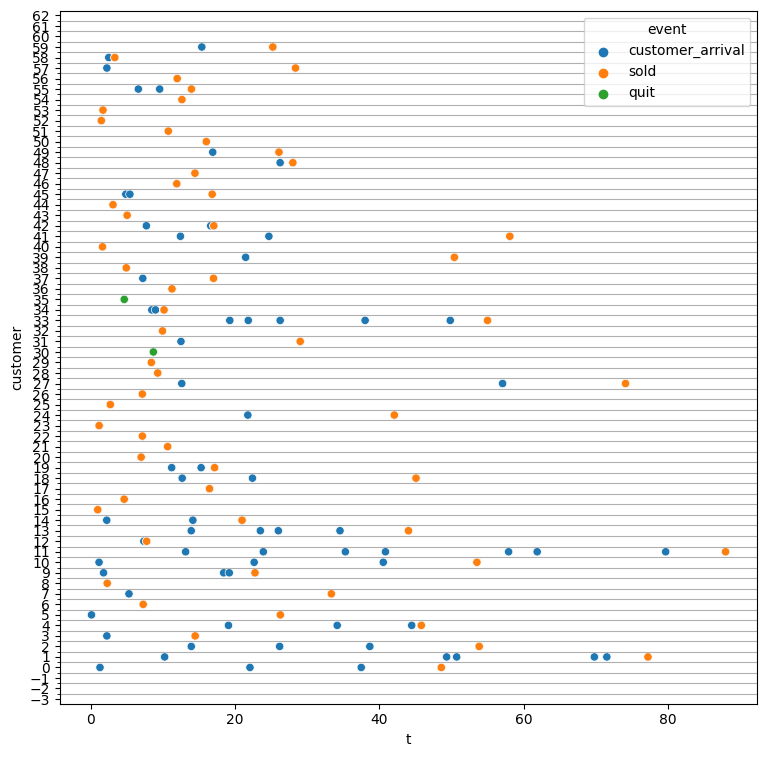

In [4]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.scatterplot(x="t", y="customer", data=event_history, hue="event", ax=ax)
ax.grid(axis="y")  # Add grid lines
ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Set grid line interval to 1
ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5)  # Extend y limits
ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Set major ticks at integers
ax.yaxis.set_minor_locator(
    plt.MultipleLocator(0.5)
)  # Set minor ticks (grid lines) at half intervals
ax.grid(True, axis="y", which="minor")  # Show minor grid lines
ax.grid(False, axis="y", which="major")  # Hide major grid lines
plt.show()

/home/laurinbrechter/.local/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


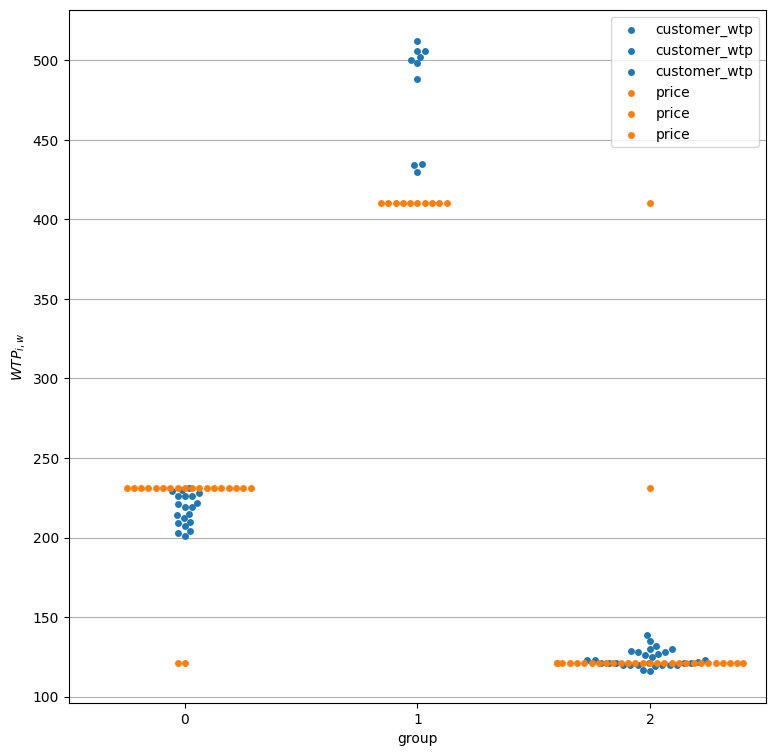

In [5]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]
fig, ax = plt.subplots(figsize=(9, 9))
sns.swarmplot(x="group", y="customer_wtp", data=quit_sold, ax=ax, label="customer_wtp")
sns.swarmplot(x="group", y="price", data=quit_sold, ax=ax, label="price")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

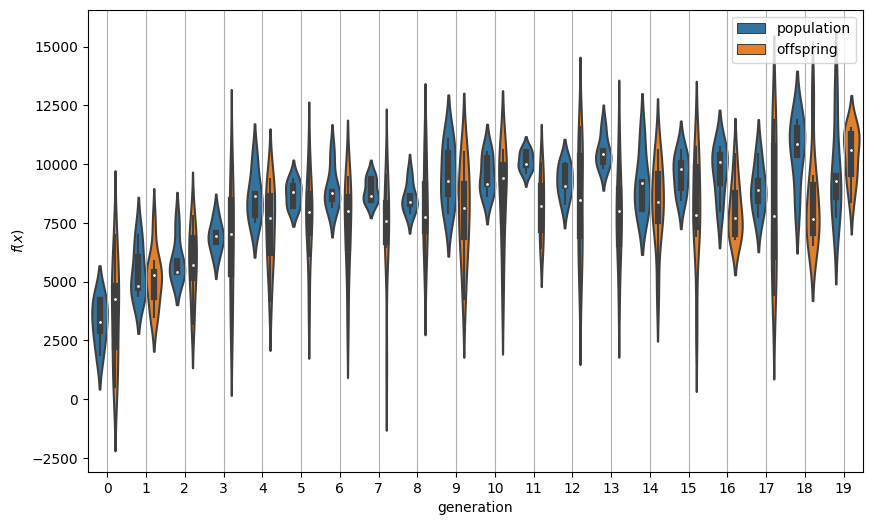

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(
    x="generation",
    y="score",
    data=evolution_log,
    hue="type",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

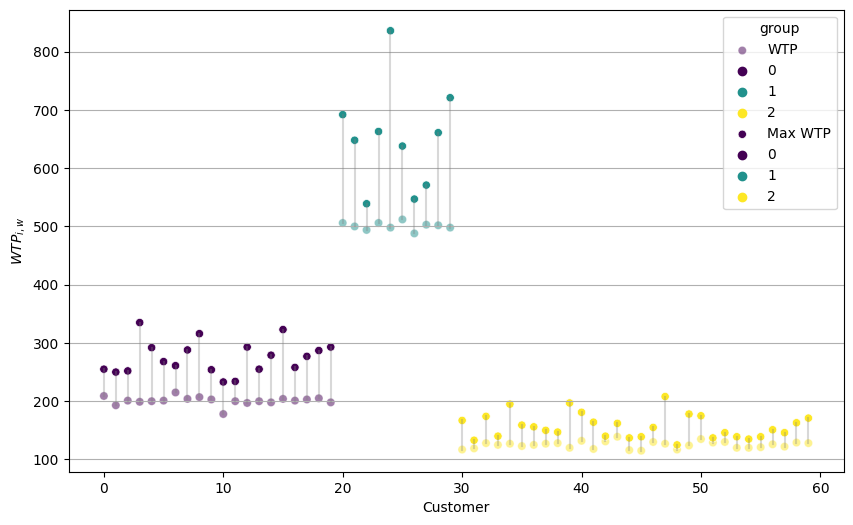

In [6]:
customers = event_history.drop_duplicates(subset=["customer"])

fig, ax = plt.subplots(figsize=(10, 6))

# First plot the scatter points
sns.scatterplot(
    x="customer",
    y="customer_wtp",
    data=customers,
    hue="group",
    label="WTP",
    palette="viridis",
    alpha=0.5,
)
sns.scatterplot(
    x="customer",
    y="customer_max_wtp",
    data=customers,
    hue="group",
    label="Max WTP",
    palette="viridis",
    alpha=1,
)

# Add lines connecting the points for each customer
for _, customer in customers.iterrows():
    ax.plot(
        [customer.customer, customer.customer],
        [customer.customer_wtp, customer.customer_max_wtp],
        color="gray",
        alpha=0.3,
        linestyle="-",
    )

ax.set_xlabel("Customer")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

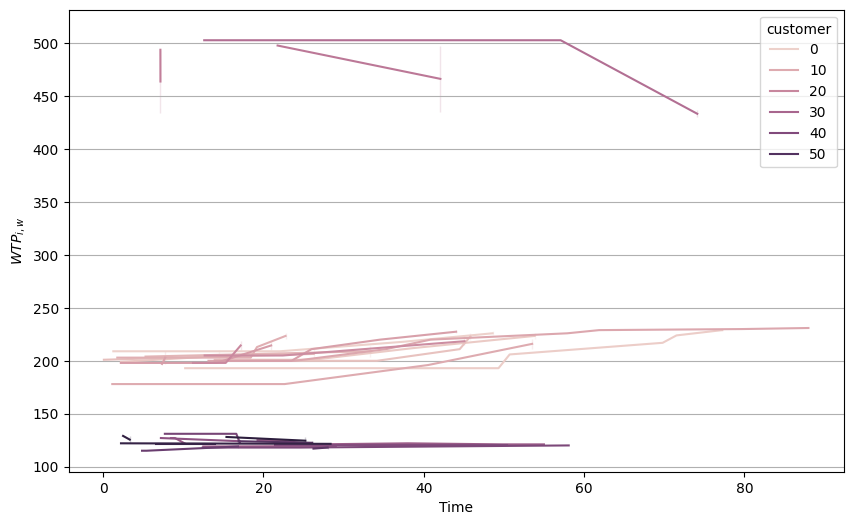

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="t", y="customer_wtp", data=event_history, hue="customer")
ax.set_xlabel("Time")
ax.set_ylabel(WTP)
ax.grid(axis="y")
plt.show()

In [20]:
price_matrix.pivot(index="group", columns="visit", values="price")

visit,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
group,,,,,,,,,,
0,NaN,59.572709,82.350183,330.236472,192.775037,153.438062,17.072976,264.546249,70.736472,0.000000
1,492.467255,81.953062,189.304647,0.000000,68.013352,42.489846,236.498986,512.860116,17.023857,84.201372
2,140.829039,231.682740,193.649593,237.040012,244.321189,320.313796,6.875586,227.077074,147.973069,174.232094


In [22]:
price_matrix

,group,visit,t,price
0,964,NaN,NaN,NaN
1,0,6.0,0.0,17.072976
2,0,1.0,0.0,59.572709
3,0,7.0,0.0,264.546249
4,0,4.0,0.0,192.775037
5,0,3.0,0.0,330.236472
6,0,5.0,0.0,153.438062
7,0,8.0,0.0,70.736472
8,0,9.0,0.0,0.000000
9,0,2.0,0.0,82.350183
